In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import random
random.seed(42)
np.random.seed(42)

# Data processing

In [3]:
dataFile = 'Data2.mat'
data = scio.loadmat(dataFile)

In [4]:
Data = data['Data2']

In [5]:
Data.shape

(88, 20)

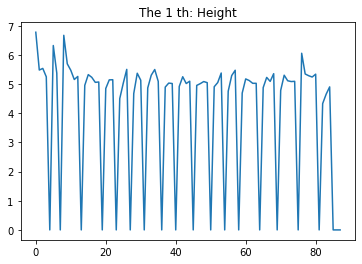

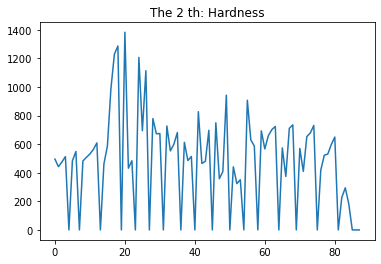

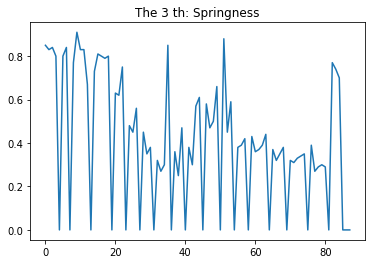

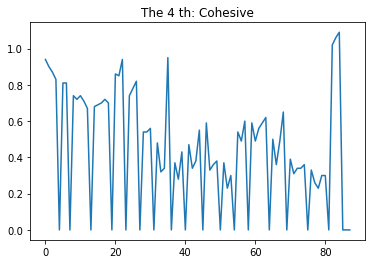

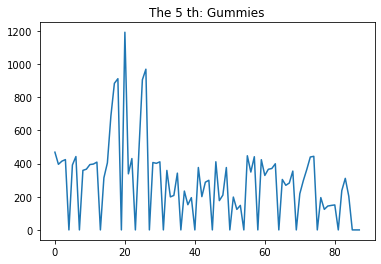

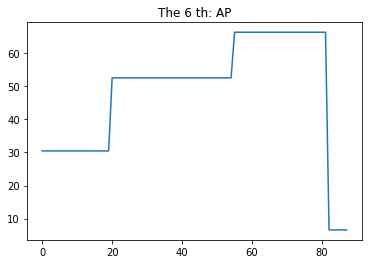

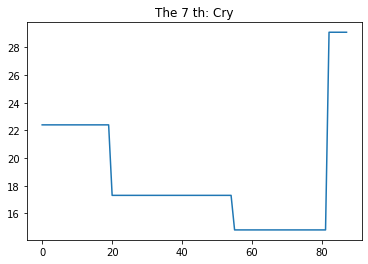

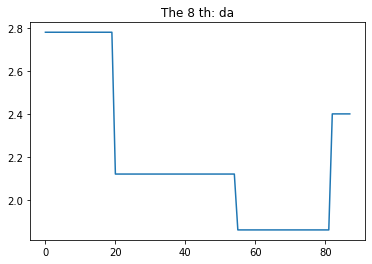

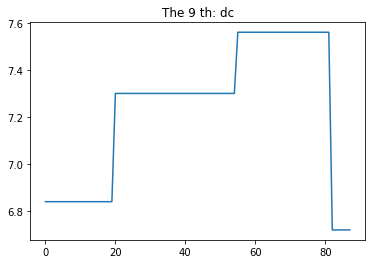

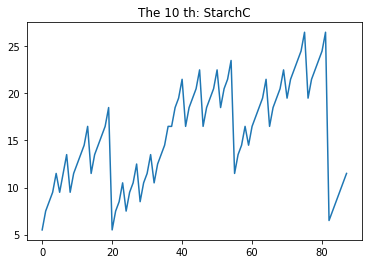

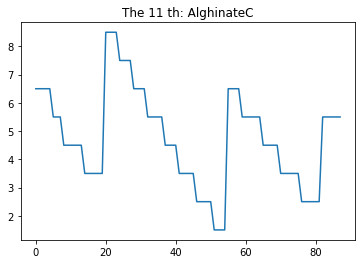

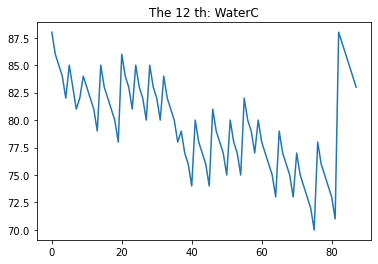

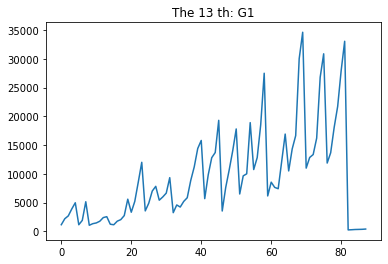

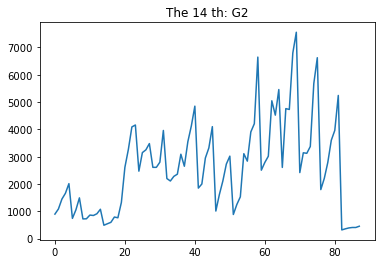

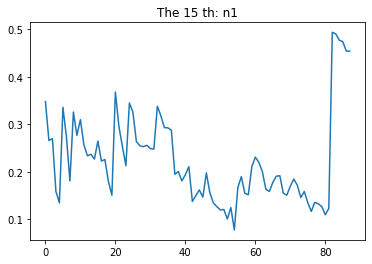

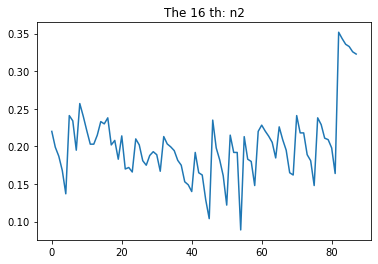

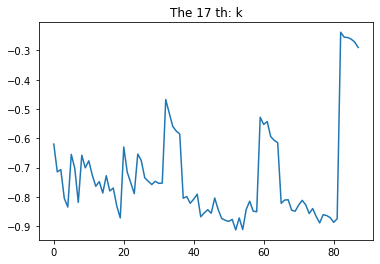

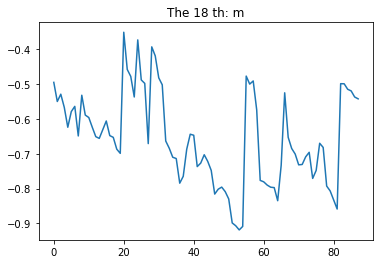

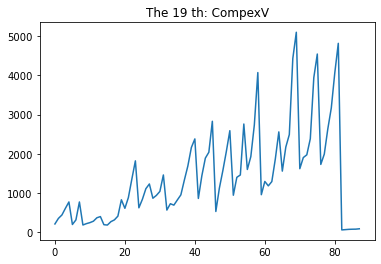

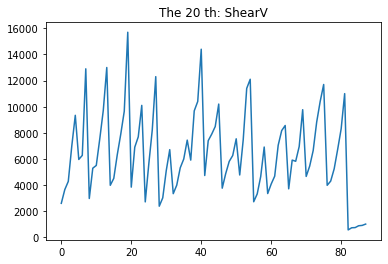

In [6]:
name = ['Height','Hardness','Springness','Cohesive','Gummies','AP','Cry','da','dc',
        'StarchC','AlghinateC','WaterC','G1','G2','n1','n2','k','m','CompexV','ShearV']
for i in range(Data.shape[1]):
    plt.title("The "+str(i+1)+ " th: "+name[i])
    plt.plot(Data[:,i])
    plt.show()

In [7]:
# label is the output of the model
PH = Data[:,0:5]
PH_n = PH
for i in range(PH.shape[1]):
    PH_n[:,i] = (PH[:,i]-np.min(PH[:,i]))/(np.max(PH[:,i])-np.min(PH[:,i]))

In [8]:
# Label is the 'Hardness','Springness','Cohesive','Gummies'
# PH = Data[:,1:5]
# PH_n = (PH-np.min(PH))/(np.max(PH)-np.min(PH))

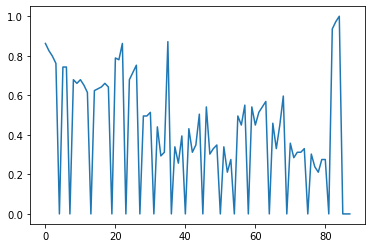

In [9]:
plt.plot(PH_n[:,3])

In [10]:
Data.shape

(88, 20)

In [11]:
# Feature normalization
Feature1 = Data[:,5:20]
Feature1.shape
Feature_n = Feature1
for i in range(Feature_n.shape[1]):
    Feature_n[:,i] = (Feature1[:,i]-np.min(Feature1[:,i]))/(np.max(Feature1[:,i])-np.min(Feature1[:,i]))

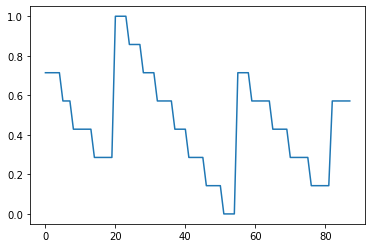

In [12]:
plt.plot(Feature_n[:,5])

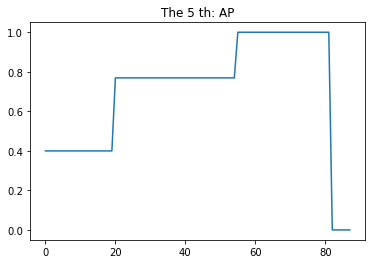

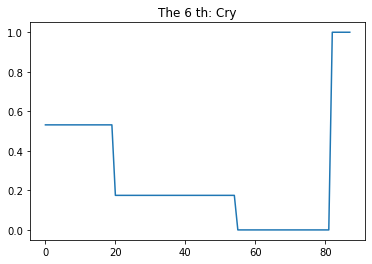

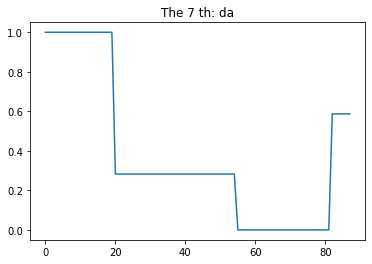

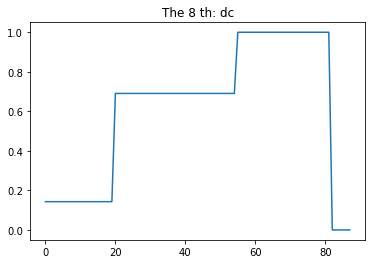

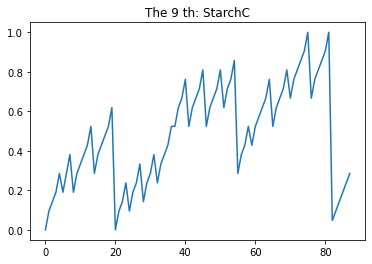

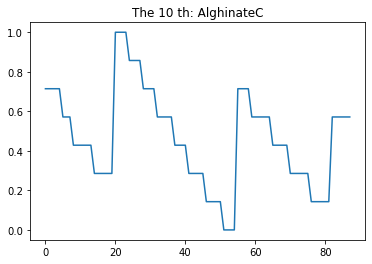

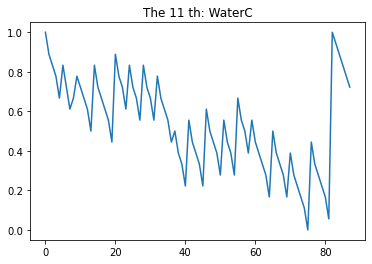

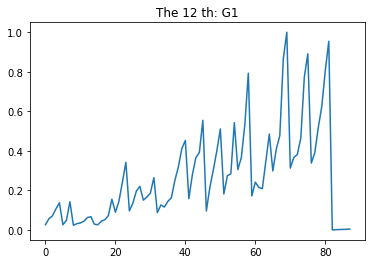

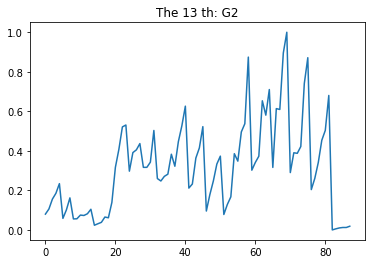

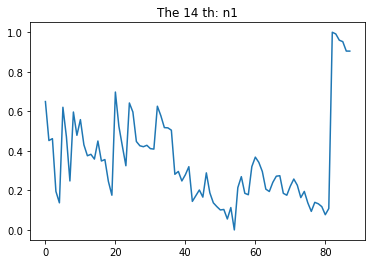

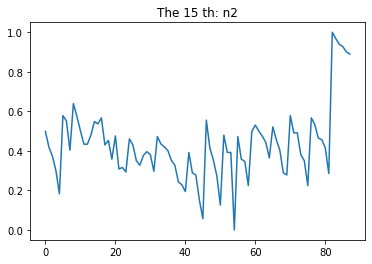

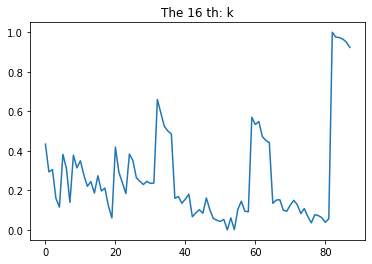

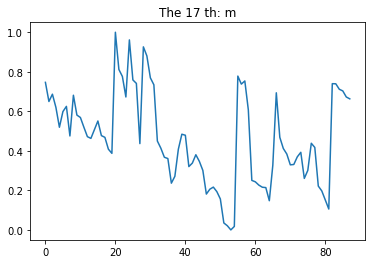

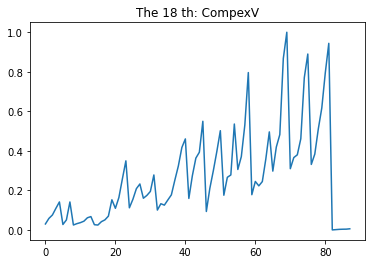

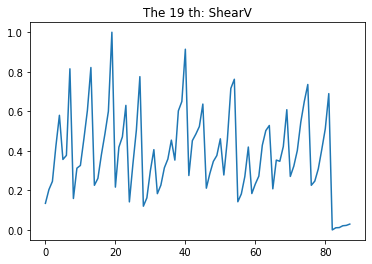

In [13]:
for i in range(Feature_n.shape[1]):
    plt.title("The "+str(i+5)+ " th: "+name[i+5])
    plt.plot(Feature_n[:,i])
    plt.show()

In [14]:
# Labels
Label1 = PH_n[:,0]
Label2 = PH_n[:,1:5]
Label3 = PH_n[:,0:5]

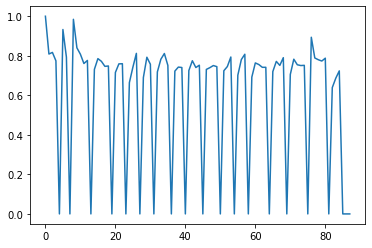

In [15]:
plt.plot(Label1)

In [16]:
# RandState 
RandState = 51

# 1. Height:  Data for model traning and testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = Feature_n
Y1 = Label1
x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.11, random_state=RandState)

In [19]:
x_train.shape

(78, 15)

In [20]:
y_train.shape

(78,)

In [21]:
x_train.shape

(78, 15)

In [22]:
y_train.shape

(78,)

In [23]:
x_test.shape

(10, 15)

In [24]:
y_test.shape

(10,)

### DNNs

In [25]:
from keras.layers import Activation, Dense

model= Sequential()
model.add(Dense((128),batch_input_shape=(None,15)))
# model.add(Dense(64, activation='relu'))
model.add(Activation('relu'))
model.add(Dense((64),batch_input_shape=(None,20)))
model.add(Activation('relu'))
model.add(Dense((64),batch_input_shape=(None,20)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense((1),batch_input_shape=(None,None)))
model.compile(loss = 'mse',optimizer = 'Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2048      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [26]:
history2 = model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
3/3 [==============================] - 24s 507ms/step - loss: 0.3520 - accuracy: 0.2663 - val_loss: 0.2356 - val_accuracy: 0.1000
Epoch 2/400
3/3 [==============================] - 0s 31ms/step - loss: 0.1924 - accuracy: 0.2429 - val_loss: 0.1041 - val_accuracy: 0.2000
Epoch 3/400
3/3 [==============================] - 0s 67ms/step - loss: 0.1292 - accuracy: 0.0828 - val_loss: 0.0601 - val_accuracy: 0.1000
Epoch 4/400
3/3 [==============================] - 0s 59ms/step - loss: 0.1285 - accuracy: 0.0000e+00 - val_loss: 0.0607 - val_accuracy: 0.1000
Epoch 5/400
3/3 [==============================] - 0s 32ms/step - loss: 0.1539 - accuracy: 0.0000e+00 - val_loss: 0.0564 - val_accuracy: 0.1000
Epoch 6/400
3/3 [==============================] - 0s 48ms/step - loss: 0.1154 - accuracy: 0.0000e+00 - val_loss: 0.0542 - val_accuracy: 0.1000
Epoch 7/400
3/3 [==============================] - 0s 35ms/step - loss: 0.0994 - accuracy: 0.0167 - val_loss: 0.0621 - val_accuracy: 0.1000
Epoch 

3/3 [==============================] - 0s 18ms/step - loss: 0.0282 - accuracy: 0.2404 - val_loss: 0.0231 - val_accuracy: 0.2000
Epoch 60/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0237 - accuracy: 0.2390 - val_loss: 0.0221 - val_accuracy: 0.2000
Epoch 61/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0204 - accuracy: 0.2248 - val_loss: 0.0228 - val_accuracy: 0.2000
Epoch 62/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0224 - accuracy: 0.2169 - val_loss: 0.0233 - val_accuracy: 0.2000
Epoch 63/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0185 - accuracy: 0.2326 - val_loss: 0.0230 - val_accuracy: 0.2000
Epoch 64/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0174 - accuracy: 0.2312 - val_loss: 0.0222 - val_accuracy: 0.2000
Epoch 65/400
3/3 [==============================] - 0s 19ms/step - loss: 0.0193 - accuracy: 0.2468 - val_loss: 0.0212 - val_accuracy: 0.2000
Epoch 66/400
3/3 [========

3/3 [==============================] - 0s 19ms/step - loss: 0.0080 - accuracy: 0.1921 - val_loss: 0.0181 - val_accuracy: 0.2000
Epoch 118/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0059 - accuracy: 0.2507 - val_loss: 0.0185 - val_accuracy: 0.2000
Epoch 119/400
3/3 [==============================] - 0s 23ms/step - loss: 0.0086 - accuracy: 0.2312 - val_loss: 0.0166 - val_accuracy: 0.2000
Epoch 120/400
3/3 [==============================] - 0s 43ms/step - loss: 0.0074 - accuracy: 0.2273 - val_loss: 0.0197 - val_accuracy: 0.2000
Epoch 121/400
3/3 [==============================] - 0s 33ms/step - loss: 0.0071 - accuracy: 0.2663 - val_loss: 0.0208 - val_accuracy: 0.2000
Epoch 122/400
3/3 [==============================] - 0s 21ms/step - loss: 0.0056 - accuracy: 0.2273 - val_loss: 0.0210 - val_accuracy: 0.2000
Epoch 123/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0061 - accuracy: 0.2390 - val_loss: 0.0169 - val_accuracy: 0.2000
Epoch 124/400
3/3 [=

Epoch 175/400
3/3 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 0.2351 - val_loss: 0.0138 - val_accuracy: 0.2000
Epoch 176/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.2468 - val_loss: 0.0131 - val_accuracy: 0.2000
Epoch 177/400
3/3 [==============================] - 0s 21ms/step - loss: 0.0034 - accuracy: 0.2077 - val_loss: 0.0138 - val_accuracy: 0.2000
Epoch 178/400
3/3 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 0.2351 - val_loss: 0.0165 - val_accuracy: 0.2000
Epoch 179/400
3/3 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 0.2429 - val_loss: 0.0208 - val_accuracy: 0.2000
Epoch 180/400
3/3 [==============================] - 0s 25ms/step - loss: 0.0039 - accuracy: 0.2429 - val_loss: 0.0142 - val_accuracy: 0.2000
Epoch 181/400
3/3 [==============================] - 0s 28ms/step - loss: 0.0034 - accuracy: 0.2234 - val_loss: 0.0128 - val_accuracy: 0.2000
Epoch 

Epoch 233/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0016 - accuracy: 0.2507 - val_loss: 0.0133 - val_accuracy: 0.2000
Epoch 234/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0023 - accuracy: 0.2546 - val_loss: 0.0122 - val_accuracy: 0.2000
Epoch 235/400
3/3 [==============================] - 0s 24ms/step - loss: 0.0024 - accuracy: 0.2507 - val_loss: 0.0131 - val_accuracy: 0.2000
Epoch 236/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.2351 - val_loss: 0.0142 - val_accuracy: 0.2000
Epoch 237/400
3/3 [==============================] - 0s 24ms/step - loss: 0.0022 - accuracy: 0.2155 - val_loss: 0.0122 - val_accuracy: 0.2000
Epoch 238/400
3/3 [==============================] - 0s 39ms/step - loss: 0.0034 - accuracy: 0.1882 - val_loss: 0.0121 - val_accuracy: 0.2000
Epoch 239/400
3/3 [==============================] - 0s 39ms/step - loss: 0.0040 - accuracy: 0.2116 - val_loss: 0.0130 - val_accuracy: 0.2000
Epoch 

Epoch 291/400
3/3 [==============================] - 0s 67ms/step - loss: 0.0016 - accuracy: 0.2820 - val_loss: 0.0115 - val_accuracy: 0.2000
Epoch 292/400
3/3 [==============================] - 0s 84ms/step - loss: 0.0015 - accuracy: 0.2351 - val_loss: 0.0132 - val_accuracy: 0.2000
Epoch 293/400
3/3 [==============================] - 0s 63ms/step - loss: 0.0023 - accuracy: 0.2234 - val_loss: 0.0128 - val_accuracy: 0.2000
Epoch 294/400
3/3 [==============================] - 0s 109ms/step - loss: 0.0030 - accuracy: 0.2468 - val_loss: 0.0125 - val_accuracy: 0.2000
Epoch 295/400
3/3 [==============================] - 1s 337ms/step - loss: 0.0024 - accuracy: 0.2429 - val_loss: 0.0121 - val_accuracy: 0.2000
Epoch 296/400
3/3 [==============================] - 0s 63ms/step - loss: 0.0015 - accuracy: 0.2077 - val_loss: 0.0118 - val_accuracy: 0.2000
Epoch 297/400
3/3 [==============================] - 0s 69ms/step - loss: 0.0018 - accuracy: 0.2546 - val_loss: 0.0128 - val_accuracy: 0.2000
Epoc

3/3 [==============================] - 0s 39ms/step - loss: 8.1002e-04 - accuracy: 0.2507 - val_loss: 0.0116 - val_accuracy: 0.2000
Epoch 349/400
3/3 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 0.2546 - val_loss: 0.0120 - val_accuracy: 0.2000
Epoch 350/400
3/3 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 0.2429 - val_loss: 0.0116 - val_accuracy: 0.2000
Epoch 351/400
3/3 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.2468 - val_loss: 0.0099 - val_accuracy: 0.2000
Epoch 352/400
3/3 [==============================] - 0s 34ms/step - loss: 0.0026 - accuracy: 0.2663 - val_loss: 0.0107 - val_accuracy: 0.2000
Epoch 353/400
3/3 [==============================] - 0s 65ms/step - loss: 0.0014 - accuracy: 0.2546 - val_loss: 0.0117 - val_accuracy: 0.2000
Epoch 354/400
3/3 [==============================] - 0s 36ms/step - loss: 9.0048e-04 - accuracy: 0.2390 - val_loss: 0.0139 - val_accuracy: 0.2000
Epoch 355/40

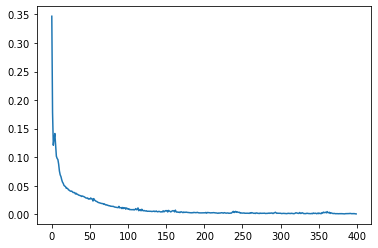

In [27]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

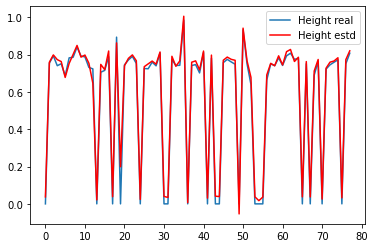

In [29]:
results_d_train = model.predict(x_train)
plt.plot(y_train,label = 'Height real')
plt.plot(results_d_train,c='r',label = 'Height estd')
plt.legend()
plt.show()

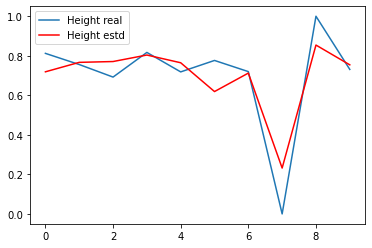

In [30]:
results_d = model.predict(x_test)
plt.plot(y_test*1,label = 'Height real')
plt.plot(results_d*1,c='r',label = 'Height estd')
plt.legend()
plt.show()

In [31]:
y_test.shape

(10,)

In [32]:
results_d = results_d.reshape(-1)
results_d.shape

(10,)

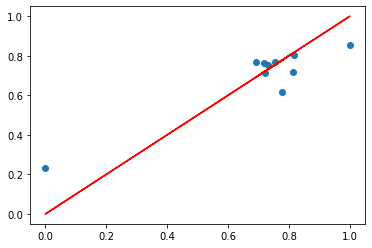

In [33]:
plt.scatter(y_test,results_d)
plt.plot(y_test,y_test,c = 'r')

In [34]:
# accuracy 
mae = np.mean(np.abs(results_d-y_test))
1-mae

0.9191780185666472

# 2.'Hardness','Springness','Cohesive','Gummies'

In [35]:
# 1. Height:  Data for model traning and testing

from sklearn.model_selection import train_test_split

X = Feature_n
Y2 = Label2
x_train, x_test, y_train, y_test = train_test_split(X, Y2, test_size=0.11, random_state=RandState)

In [36]:
x_train.shape

(78, 15)

In [37]:
y_train.shape

(78, 4)

In [38]:
x_train.shape

(78, 15)

In [39]:
y_train.shape

(78, 4)

In [40]:
x_test.shape

(10, 15)

In [41]:
y_test.shape

(10, 4)

In [42]:
### DNNs

from keras.layers import Activation, Dense

model= Sequential()
model.add(Dense((128),batch_input_shape=(None,15)))
# model.add(Dense(64, activation='relu'))
model.add(Activation('relu'))
model.add(Dense((16),batch_input_shape=(None,20)))
model.add(Activation('relu'))
model.add(Dense((16),batch_input_shape=(None,20)))
# model.add(Dropout(0.2))
model.add(Dense((4),batch_input_shape=(None,None)))
model.compile(loss = 'mse',optimizer = 'Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 68        
Total params: 4,452
Trainable params: 4,452
Non-trainable params: 0
____________________________________________________

In [43]:
history2 = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
3/3 [==============================] - 2s 247ms/step - loss: 0.2258 - accuracy: 0.5206 - val_loss: 0.2064 - val_accuracy: 0.2000
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.1540 - accuracy: 0.5011 - val_loss: 0.1815 - val_accuracy: 0.2000
Epoch 3/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1338 - accuracy: 0.4847 - val_loss: 0.1564 - val_accuracy: 0.3000
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.1130 - accuracy: 0.2805 - val_loss: 0.1261 - val_accuracy: 0.3000
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.1005 - accuracy: 0.1536 - val_loss: 0.0957 - val_accuracy: 0.3000
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0816 - accuracy: 0.1771 - val_loss: 0.0735 - val_accuracy: 0.3000
Epoch 7/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0785 - accuracy: 0.1679 - val_loss: 0.0604 - val_accuracy: 0.3000
Epoch 8/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0386 - accuracy: 0.5167 - val_loss: 0.0403 - val_accuracy: 0.5000
Epoch 59/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0339 - accuracy: 0.5011 - val_loss: 0.0392 - val_accuracy: 0.5000
Epoch 60/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0311 - accuracy: 0.5388 - val_loss: 0.0388 - val_accuracy: 0.5000
Epoch 61/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.5452 - val_loss: 0.0389 - val_accuracy: 0.6000
Epoch 62/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0290 - accuracy: 0.5309 - val_loss: 0.0393 - val_accuracy: 0.5000
Epoch 63/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0304 - accuracy: 0.5867 - val_loss: 0.0387 - val_accuracy: 0.4000
Epoch 64/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.5541 - val_loss: 0.0388 - val_accuracy: 0.4000
Epoch 65/1000
3/3 [=

Epoch 116/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0220 - accuracy: 0.6319 - val_loss: 0.0352 - val_accuracy: 0.7000
Epoch 117/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0237 - accuracy: 0.6085 - val_loss: 0.0371 - val_accuracy: 0.7000
Epoch 118/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0227 - accuracy: 0.6124 - val_loss: 0.0348 - val_accuracy: 0.6000
Epoch 119/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0224 - accuracy: 0.5775 - val_loss: 0.0351 - val_accuracy: 0.5000
Epoch 120/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0224 - accuracy: 0.5580 - val_loss: 0.0347 - val_accuracy: 0.7000
Epoch 121/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0241 - accuracy: 0.5943 - val_loss: 0.0359 - val_accuracy: 0.7000
Epoch 122/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0226 - accuracy: 0.6280 - val_loss: 0.0351 - val_accuracy: 0.5000

Epoch 173/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0153 - accuracy: 0.6372 - val_loss: 0.0275 - val_accuracy: 0.5000
Epoch 174/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0174 - accuracy: 0.6227 - val_loss: 0.0287 - val_accuracy: 0.7000
Epoch 175/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0167 - accuracy: 0.5957 - val_loss: 0.0306 - val_accuracy: 0.7000
Epoch 176/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0145 - accuracy: 0.4997 - val_loss: 0.0295 - val_accuracy: 0.7000
Epoch 177/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0156 - accuracy: 0.6525 - val_loss: 0.0286 - val_accuracy: 0.6000
Epoch 178/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0149 - accuracy: 0.6110 - val_loss: 0.0289 - val_accuracy: 0.7000
Epoch 179/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0146 - accuracy: 0.6124 - val_loss: 0.0286 - val_accuracy: 0.7000

3/3 [==============================] - 0s 47ms/step - loss: 0.0109 - accuracy: 0.5864 - val_loss: 0.0248 - val_accuracy: 0.7000
Epoch 231/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0096 - accuracy: 0.5903 - val_loss: 0.0260 - val_accuracy: 0.7000
Epoch 232/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0121 - accuracy: 0.6074 - val_loss: 0.0257 - val_accuracy: 0.6000
Epoch 233/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0116 - accuracy: 0.6138 - val_loss: 0.0239 - val_accuracy: 0.6000
Epoch 234/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0101 - accuracy: 0.6422 - val_loss: 0.0241 - val_accuracy: 0.6000
Epoch 235/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0099 - accuracy: 0.6671 - val_loss: 0.0263 - val_accuracy: 0.7000
Epoch 236/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0111 - accuracy: 0.6049 - val_loss: 0.0262 - val_accuracy: 0.6000
Epoch 237/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.0084 - accuracy: 0.5811 - val_loss: 0.0243 - val_accuracy: 0.6000
Epoch 288/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0089 - accuracy: 0.6525 - val_loss: 0.0244 - val_accuracy: 0.6000
Epoch 289/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0094 - accuracy: 0.6696 - val_loss: 0.0233 - val_accuracy: 0.6000
Epoch 290/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0072 - accuracy: 0.6266 - val_loss: 0.0230 - val_accuracy: 0.6000
Epoch 291/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0100 - accuracy: 0.6188 - val_loss: 0.0242 - val_accuracy: 0.6000
Epoch 292/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0080 - accuracy: 0.6486 - val_loss: 0.0239 - val_accuracy: 0.6000
Epoch 293/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0082 - accuracy: 0.6550 - val_loss: 0.0226 - val_accuracy: 0.7000
Epoch 294/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.0076 - accuracy: 0.6511 - val_loss: 0.0228 - val_accuracy: 0.6000
Epoch 345/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0075 - accuracy: 0.6746 - val_loss: 0.0227 - val_accuracy: 0.6000
Epoch 346/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0073 - accuracy: 0.6550 - val_loss: 0.0217 - val_accuracy: 0.6000
Epoch 347/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0080 - accuracy: 0.6483 - val_loss: 0.0216 - val_accuracy: 0.6000
Epoch 348/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0075 - accuracy: 0.6952 - val_loss: 0.0218 - val_accuracy: 0.6000
Epoch 349/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0072 - accuracy: 0.6497 - val_loss: 0.0225 - val_accuracy: 0.6000
Epoch 350/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0094 - accuracy: 0.6615 - val_loss: 0.0222 - val_accuracy: 0.6000
Epoch 351/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.0066 - accuracy: 0.6771 - val_loss: 0.0217 - val_accuracy: 0.6000
Epoch 402/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0062 - accuracy: 0.6952 - val_loss: 0.0206 - val_accuracy: 0.7000
Epoch 403/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0072 - accuracy: 0.6525 - val_loss: 0.0215 - val_accuracy: 0.6000
Epoch 404/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0074 - accuracy: 0.6007 - val_loss: 0.0215 - val_accuracy: 0.6000
Epoch 405/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0065 - accuracy: 0.7094 - val_loss: 0.0207 - val_accuracy: 0.7000
Epoch 406/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0070 - accuracy: 0.7329 - val_loss: 0.0217 - val_accuracy: 0.6000
Epoch 407/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0069 - accuracy: 0.6757 - val_loss: 0.0212 - val_accuracy: 0.7000
Epoch 408/1000

3/3 [==============================] - 0s 44ms/step - loss: 0.0055 - accuracy: 0.6835 - val_loss: 0.0209 - val_accuracy: 0.7000
Epoch 459/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0062 - accuracy: 0.6458 - val_loss: 0.0223 - val_accuracy: 0.6000
Epoch 460/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0068 - accuracy: 0.6835 - val_loss: 0.0212 - val_accuracy: 0.7000
Epoch 461/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0063 - accuracy: 0.7276 - val_loss: 0.0209 - val_accuracy: 0.7000
Epoch 462/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0057 - accuracy: 0.6885 - val_loss: 0.0208 - val_accuracy: 0.6000
Epoch 463/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0064 - accuracy: 0.6980 - val_loss: 0.0208 - val_accuracy: 0.6000
Epoch 464/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0074 - accuracy: 0.6458 - val_loss: 0.0196 - val_accuracy: 0.7000
Epoch 465/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.0055 - accuracy: 0.7094 - val_loss: 0.0213 - val_accuracy: 0.7000
Epoch 516/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0055 - accuracy: 0.7340 - val_loss: 0.0211 - val_accuracy: 0.7000
Epoch 517/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0056 - accuracy: 0.6799 - val_loss: 0.0218 - val_accuracy: 0.7000
Epoch 518/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0059 - accuracy: 0.6252 - val_loss: 0.0212 - val_accuracy: 0.7000
Epoch 519/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0053 - accuracy: 0.7119 - val_loss: 0.0218 - val_accuracy: 0.7000
Epoch 520/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0050 - accuracy: 0.7326 - val_loss: 0.0224 - val_accuracy: 0.7000
Epoch 521/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0067 - accuracy: 0.6601 - val_loss: 0.0229 - val_accuracy: 0.7000
Epoch 522/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.0044 - accuracy: 0.7209 - val_loss: 0.0195 - val_accuracy: 0.6000
Epoch 573/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 0.7752 - val_loss: 0.0199 - val_accuracy: 0.7000
Epoch 574/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0057 - accuracy: 0.6902 - val_loss: 0.0211 - val_accuracy: 0.7000
Epoch 575/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0058 - accuracy: 0.6213 - val_loss: 0.0204 - val_accuracy: 0.7000
Epoch 576/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0061 - accuracy: 0.7237 - val_loss: 0.0194 - val_accuracy: 0.5000
Epoch 577/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0058 - accuracy: 0.7312 - val_loss: 0.0218 - val_accuracy: 0.7000
Epoch 578/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0054 - accuracy: 0.7058 - val_loss: 0.0207 - val_accuracy: 0.7000
Epoch 579/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.0051 - accuracy: 0.7471 - val_loss: 0.0232 - val_accuracy: 0.6000
Epoch 630/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0051 - accuracy: 0.6252 - val_loss: 0.0202 - val_accuracy: 0.7000
Epoch 631/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0055 - accuracy: 0.7220 - val_loss: 0.0201 - val_accuracy: 0.6000
Epoch 632/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 0.7183 - val_loss: 0.0221 - val_accuracy: 0.7000
Epoch 633/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 0.6497 - val_loss: 0.0216 - val_accuracy: 0.7000
Epoch 634/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0051 - accuracy: 0.7119 - val_loss: 0.0201 - val_accuracy: 0.6000
Epoch 635/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0055 - accuracy: 0.7404 - val_loss: 0.0209 - val_accuracy: 0.7000
Epoch 636/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.0048 - accuracy: 0.7080 - val_loss: 0.0217 - val_accuracy: 0.7000
Epoch 687/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0043 - accuracy: 0.6483 - val_loss: 0.0213 - val_accuracy: 0.7000
Epoch 688/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 0.6522 - val_loss: 0.0203 - val_accuracy: 0.6000
Epoch 689/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 0.7055 - val_loss: 0.0208 - val_accuracy: 0.6000
Epoch 690/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0045 - accuracy: 0.7002 - val_loss: 0.0223 - val_accuracy: 0.6000
Epoch 691/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0048 - accuracy: 0.6863 - val_loss: 0.0213 - val_accuracy: 0.7000
Epoch 692/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 0.7080 - val_loss: 0.0205 - val_accuracy: 0.7000
Epoch 693/1000

3/3 [==============================] - 0s 27ms/step - loss: 0.0050 - accuracy: 0.6330 - val_loss: 0.0216 - val_accuracy: 0.7000
Epoch 744/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0038 - accuracy: 0.7237 - val_loss: 0.0215 - val_accuracy: 0.6000
Epoch 745/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0046 - accuracy: 0.7610 - val_loss: 0.0225 - val_accuracy: 0.7000
Epoch 746/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0036 - accuracy: 0.7340 - val_loss: 0.0234 - val_accuracy: 0.6000
Epoch 747/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0040 - accuracy: 0.6291 - val_loss: 0.0210 - val_accuracy: 0.7000
Epoch 748/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0040 - accuracy: 0.7223 - val_loss: 0.0203 - val_accuracy: 0.7000
Epoch 749/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0045 - accuracy: 0.7105 - val_loss: 0.0224 - val_accuracy: 0.7000
Epoch 750/1000

3/3 [==============================] - 0s 42ms/step - loss: 0.0042 - accuracy: 0.7119 - val_loss: 0.0250 - val_accuracy: 0.6000
Epoch 801/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0044 - accuracy: 0.6163 - val_loss: 0.0209 - val_accuracy: 0.7000
Epoch 802/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0037 - accuracy: 0.6924 - val_loss: 0.0188 - val_accuracy: 0.6000
Epoch 803/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0039 - accuracy: 0.8118 - val_loss: 0.0242 - val_accuracy: 0.6000
Epoch 804/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0043 - accuracy: 0.5783 - val_loss: 0.0218 - val_accuracy: 0.7000
Epoch 805/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.0040 - accuracy: 0.7401 - val_loss: 0.0214 - val_accuracy: 0.7000
Epoch 806/1000
3/3 [==============================] - 0s 173ms/step - loss: 0.0037 - accuracy: 0.7493 - val_loss: 0.0210 - val_accuracy: 0.7000
Epoch 807/100

3/3 [==============================] - 1s 276ms/step - loss: 0.0034 - accuracy: 0.8296 - val_loss: 0.0246 - val_accuracy: 0.7000
Epoch 858/1000
3/3 [==============================] - 1s 256ms/step - loss: 0.0048 - accuracy: 0.6604 - val_loss: 0.0240 - val_accuracy: 0.7000
Epoch 859/1000
3/3 [==============================] - 0s 102ms/step - loss: 0.0042 - accuracy: 0.6782 - val_loss: 0.0202 - val_accuracy: 0.4000
Epoch 860/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.0045 - accuracy: 0.7845 - val_loss: 0.0233 - val_accuracy: 0.7000
Epoch 861/1000
3/3 [==============================] - 0s 118ms/step - loss: 0.0040 - accuracy: 0.6333 - val_loss: 0.0240 - val_accuracy: 0.7000
Epoch 862/1000
3/3 [==============================] - 1s 290ms/step - loss: 0.0035 - accuracy: 0.6587 - val_loss: 0.0194 - val_accuracy: 0.6000
Epoch 863/1000
3/3 [==============================] - 0s 163ms/step - loss: 0.0039 - accuracy: 0.7688 - val_loss: 0.0246 - val_accuracy: 0.7000
Epoch 8

3/3 [==============================] - 0s 29ms/step - loss: 0.0033 - accuracy: 0.7351 - val_loss: 0.0217 - val_accuracy: 0.7000
Epoch 915/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0038 - accuracy: 0.7276 - val_loss: 0.0230 - val_accuracy: 0.7000
Epoch 916/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0029 - accuracy: 0.6935 - val_loss: 0.0224 - val_accuracy: 0.7000
Epoch 917/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0026 - accuracy: 0.7716 - val_loss: 0.0240 - val_accuracy: 0.7000
Epoch 918/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0031 - accuracy: 0.6874 - val_loss: 0.0213 - val_accuracy: 0.7000
Epoch 919/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0032 - accuracy: 0.7713 - val_loss: 0.0217 - val_accuracy: 0.7000
Epoch 920/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.0033 - accuracy: 0.7379 - val_loss: 0.0234 - val_accuracy: 0.7000
Epoch 921/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.0039 - accuracy: 0.6810 - val_loss: 0.0225 - val_accuracy: 0.7000
Epoch 972/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0032 - accuracy: 0.7158 - val_loss: 0.0250 - val_accuracy: 0.7000
Epoch 973/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 0.7027 - val_loss: 0.0261 - val_accuracy: 0.7000
Epoch 974/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0034 - accuracy: 0.7276 - val_loss: 0.0249 - val_accuracy: 0.7000
Epoch 975/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0034 - accuracy: 0.7362 - val_loss: 0.0237 - val_accuracy: 0.7000
Epoch 976/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0041 - accuracy: 0.6394 - val_loss: 0.0269 - val_accuracy: 0.7000
Epoch 977/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0035 - accuracy: 0.6277 - val_loss: 0.0229 - val_accuracy: 0.7000
Epoch 978/1000

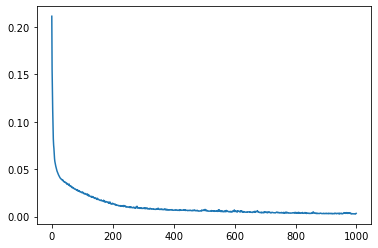

In [45]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

In [46]:
y_train.shape

(78, 4)

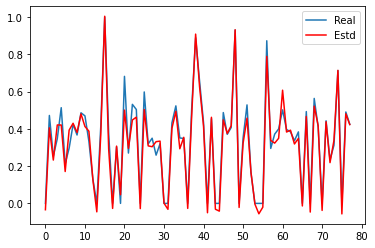

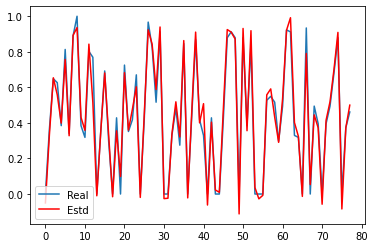

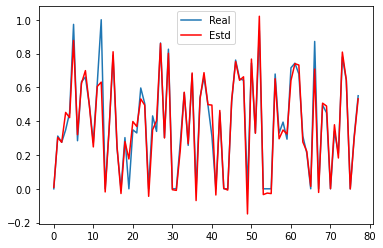

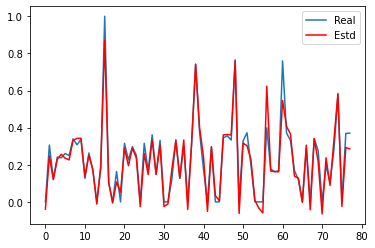

In [47]:
results_d_train = model.predict(x_train)
for i in range(y_train.shape[1]):
    plt.plot(y_train[:,i],label = 'Real')
    plt.plot(results_d_train[:,i],c='r',label = 'Estd')
    plt.legend()
    plt.show()

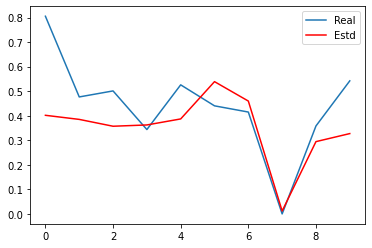

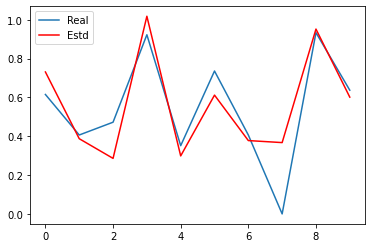

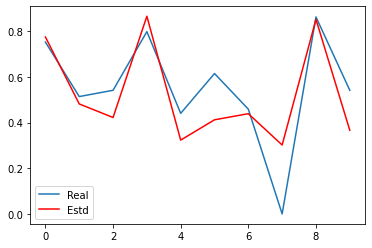

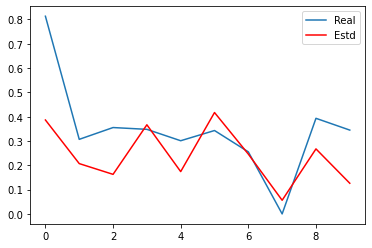

In [48]:
results_d = model.predict(x_test)
for i in range(y_train.shape[1]):
    plt.plot(y_test[:,i],label = 'Real')
    plt.plot(results_d[:,i],c='r',label = 'Estd')
    plt.legend()
    plt.show()

In [49]:
# for i in range(y_test.shape[1]):
#     plt.scatter(y_test[:,i],results_d[:,i])
#     plt.plot(y_test[:,i],y_test[:,i],c = 'r')
#     plt.show()

In [50]:
mae = np.mean(np.abs(results_d-y_test))
1-mae

0.8827309739328602

In [51]:
np.mean(np.abs(results_d-y_test),0)

array([0.12304696, 0.10439842, 0.10677716, 0.13485357])

In [52]:
1-np.mean(np.abs(results_d-y_test),0)

array([0.87695304, 0.89560158, 0.89322284, 0.86514643])

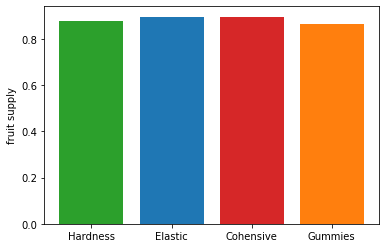

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['Hardness', 'Elastic', 'Cohensive', 'Gummies']
counts = 1-np.mean(np.abs(results_d-y_test),0)
bar_labels = ['green', 'blue', '_red', 'orange']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
plt.show()